In [1]:
import scipy.stats
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("D:/경기대/2학년_2학기/dna 동아리/전주공모전/핵심데이터/전주시불법주정차top1000전처리위치.csv", encoding='cp949')
df.head(3)

,불법주차수,주소,Latitude,Longitude,주소.1
0,18573,덕진구 전북대구정문앞,35.846732,127.129367,덕진구 전북대구정문앞
1,14891,완산구 서노송동 노송광장로,35.824768,127.146416,완산구 서노송동 노송광장로
2,12209,덕진구 고속버스터미널,35.835645,127.129305,덕진구 고속버스터미널


In [3]:
df['구청구분'] = df['주소'].str.split(' ').str[0]

In [4]:
df['구청구분'].value_counts()

완산구    527
덕진구    420
Name: 구청구분, dtype: int64

In [22]:
df.head(3)

,불법주차수,주소,Latitude,Longitude,주소.1,구청구분
0,18573,덕진구 전북대구정문앞,35.846732,127.129367,덕진구 전북대구정문앞,덕진구
1,14891,완산구 서노송동 노송광장로,35.824768,127.146416,완산구 서노송동 노송광장로,완산구
2,12209,덕진구 고속버스터미널,35.835645,127.129305,덕진구 고속버스터미널,덕진구


In [5]:
df = df.drop(columns=['주소.1', 'Latitude', 'Longitude'], axis=1)
df.head(3)

,불법주차수,주소,구청구분
0,18573,덕진구 전북대구정문앞,덕진구
1,14891,완산구 서노송동 노송광장로,완산구
2,12209,덕진구 고속버스터미널,덕진구


In [6]:
df1 = df[df['구청구분']== '덕진구']
df2 = df[df['구청구분']=='완산구']

In [27]:
df2.head(3)

,불법주차수,주소,구청구분
1,14891,완산구 서노송동 노송광장로,완산구
5,8462,완산구 E마트,완산구
8,8058,완산구 효자동3가 마전들로,완산구


In [8]:
import numpy as np

In [9]:
df1mean = df1.mean() #n은 420
df2mean = df2.mean() #n은 527

In [10]:
df1mean

불법주차수    967.707143
dtype: float64

In [11]:
df2mean

불법주차수    869.121442
dtype: float64

In [12]:
from scipy.stats import shapiro
#정규성 검정
df3 = df['불법주차수']
shapiro(df3) #정규성 만족 

ShapiroResult(statistic=0.5289303064346313, pvalue=1.6815581571897805e-44)

In [13]:
from scipy.stats import levene, ttest_ind
print(levene(df1['불법주차수'], df2['불법주차수'])) #등분산성 만족

LeveneResult(statistic=0.3296528989674659, pvalue=0.5660001781699984)


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52397 missing from current

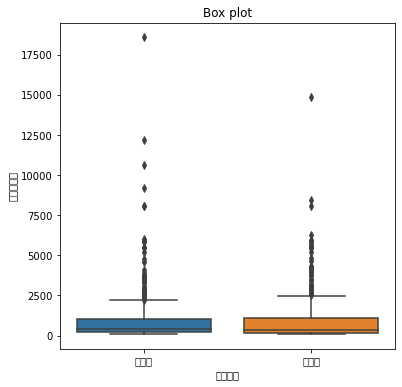

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(x='구청구분', y='불법주차수', data=df)
plt.title('Box plot')
plt.show()

In [14]:
from scipy.stats import levene, ttest_ind
ttest_ind(df1['불법주차수'], df2['불법주차수'] #H0 NOT REGECT

Ttest_indResult(statistic=1.0168661123579308, pvalue=0.3094773915723379)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from c

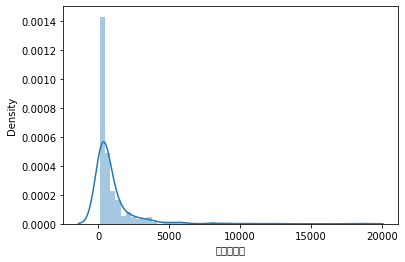

In [59]:
x=df1['불법주차수']
sns.distplot(x)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from c

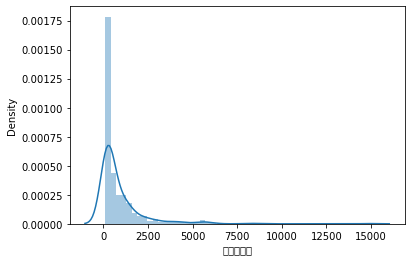

In [60]:
x=df2['불법주차수']
sns.distplot(x)
plt.show()